## Fake News Detection -  Part 1
### Importing Libraries

In [1]:
## Pandas Library is used to read data files  
import pandas as pd
## Numpy is library to create and handle arrays into machine
import numpy as np
# Matplotlib is used to create figures and plots 
import matplotlib.pyplot as plt
# Sea born is used to get most frquent words
import seaborn as sns 
# SKLearn library is used for all machine learning related tasks
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Time library is used to handle machine time
import time

# Read datasets

In [2]:
# Reading both files seperately into two variables
## To Avoid Error casused by large file
fake = pd.read_csv("../dataset_new/Fake.csv",low_memory=False)
true = pd.read_csv("../dataset_new/True.csv",low_memory=False)

In [3]:
## Gettign No of obsrevation into rows and No of Feature into columns for Fake Class
fake.shape

(22827, 4)

In [4]:
## Getting No of obsrevation into rows and No of Feature into columns for True Class
true.shape

(21416, 4)

# Data cleaning and preparation

In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
#Concatenate dataframes into a single variables
data = pd.concat([fake, true]).reset_index(drop = True)
#Getting Matrix size for combined dataframe (Target/label is at last inedx, that's why it is converted from Mx4 to Mx5 now)
data.shape

(44243, 5)

In [7]:
# Shuffle the dataset to make it look real 
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Displaying few of samples from the dataset
data.head()

,title,text,subject,date,target
0,"Factbox: Trump controversies: Michael Flynn, t...",(Reuters) - The continuing controversy over fo...,Politics,"February 16, 2017",true
1,Jets strike U.S.-backed forces in eastern Syria,BEIRUT (Reuters) - U.S.-backed militias in Syr...,World News,"September 16, 2017",true
2,UPDATE ON MONSTER MOM Who Kicked Little Boy Ou...,JUSTICE FOR CHILDREN WITHOUT VOICES: We have s...,Politics,"Nov 11, 2016",fake
3,Clinton calls Trump's proposal to dismantle Do...,WASHINGTON (Reuters) - Democratic presidential...,Politics,"May 17, 2016",true
4,U.S. official met Syrian security chief in Dam...,BEIRUT (Reuters) - A senior U.S. official met ...,World News,"November 3, 2017",true


In [9]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
# Displaying few of samples from the dataset
data.head()

,title,text,subject,target
0,"Factbox: Trump controversies: Michael Flynn, t...",(Reuters) - The continuing controversy over fo...,Politics,true
1,Jets strike U.S.-backed forces in eastern Syria,BEIRUT (Reuters) - U.S.-backed militias in Syr...,World News,true
2,UPDATE ON MONSTER MOM Who Kicked Little Boy Ou...,JUSTICE FOR CHILDREN WITHOUT VOICES: We have s...,Politics,fake
3,Clinton calls Trump's proposal to dismantle Do...,WASHINGTON (Reuters) - Democratic presidential...,Politics,true
4,U.S. official met Syrian security chief in Dam...,BEIRUT (Reuters) - A senior U.S. official met ...,World News,true


In [10]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
# Displaying few of samples from the dataset
data.head()

,text,subject,target
0,(Reuters) - The continuing controversy over fo...,Politics,true
1,BEIRUT (Reuters) - U.S.-backed militias in Syr...,World News,true
2,JUSTICE FOR CHILDREN WITHOUT VOICES: We have s...,Politics,fake
3,WASHINGTON (Reuters) - Democratic presidential...,Politics,true
4,BEIRUT (Reuters) - A senior U.S. official met ...,World News,true


In [11]:
# Convert all the values from text column to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
# Displaying few of samples from the dataset
data.head()

,text,subject,target
0,(reuters) - the continuing controversy over fo...,Politics,true
1,beirut (reuters) - u.s.-backed militias in syr...,World News,true
2,justice for children without voices: we have s...,Politics,fake
3,washington (reuters) - democratic presidential...,Politics,true
4,beirut (reuters) - a senior u.s. official met ...,World News,true


In [12]:
# Remove punctuations in text column if any 

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
# # Displaying few of samples from the dataset
data.head()

,text,subject,target
0,reuters the continuing controversy over forme...,Politics,true
1,beirut reuters usbacked militias in syria sai...,World News,true
2,justice for children without voices we have sp...,Politics,fake
3,washington reuters democratic presidential ca...,Politics,true
4,beirut reuters a senior us official met syria...,World News,true


In [14]:
# Removing stopwords
# Mightbe it gives error in mac, if it gives error in mac, you can remove from line 3 to line 12 (else word) and keep only
# keep this only ->  nltk.download('stopwords')
# From line 3 to line 12, it is just checking whether the stopwords file is already downloaded or not
import os
base_dir = (r"C:\Users\\")
user = os.getlogin()
filename =(r"\AppData\Roaming\nltk_data\corpora\stopwords.zip")
fullpath = (base_dir + user + filename)

import nltk
if fullpath:
    print('File Already Exist : ',fullpath)
else:
    nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
# Removing stop word in Text column
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

File Already Exist :  C:\Users\\Rashid Rao\AppData\Roaming\nltk_data\corpora\stopwords.zip


In [15]:
# Displaying few of samples from the dataset
data.head()

,text,subject,target
0,reuters continuing controversy former national...,Politics,true
1,beirut reuters usbacked militias syria said ca...,World News,true
2,justice children without voices spoken detecti...,Politics,fake
3,washington reuters democratic presidential can...,Politics,true
4,beirut reuters senior us official met syria na...,World News,true


# Basic data exploration

subject
Politics      17694
World News    26545
Name: text, dtype: int64


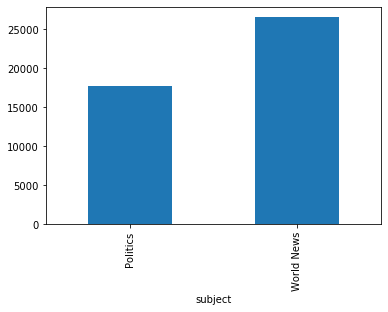

In [16]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    22827
true    21416
Name: text, dtype: int64


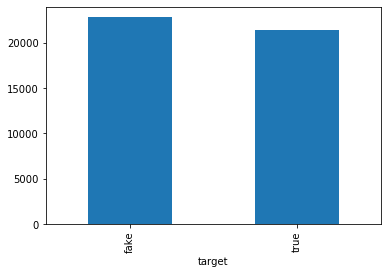

In [17]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [18]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

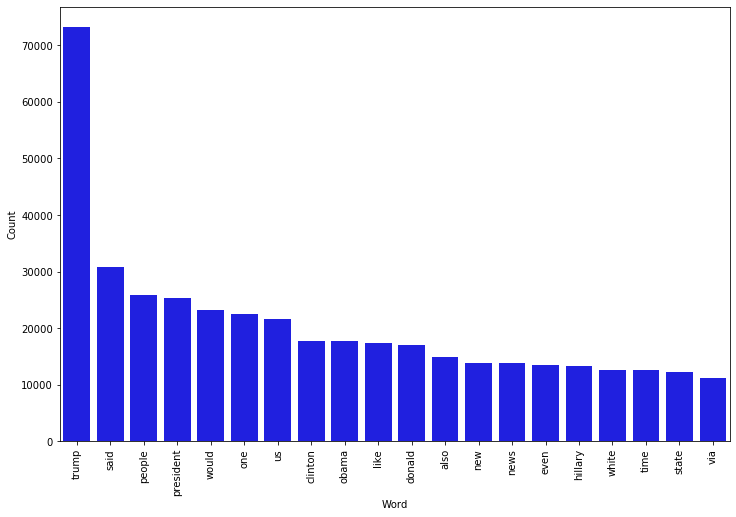

In [19]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

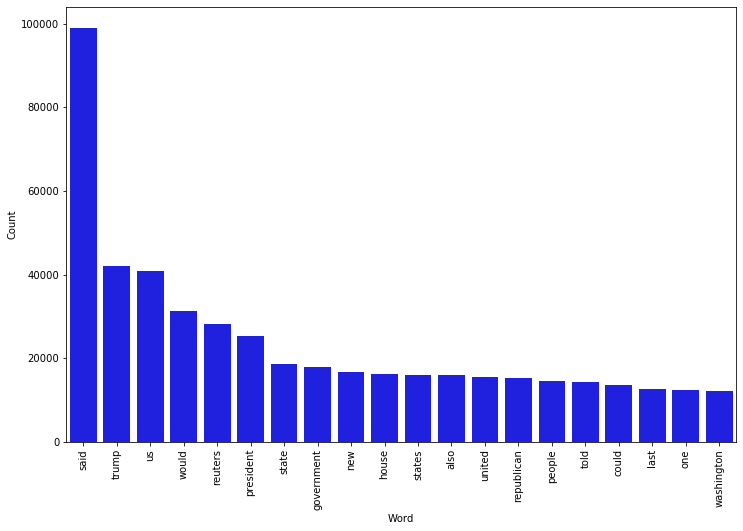

In [20]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [21]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

## User defined function to create Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Peparing the data

In [22]:
# Split the data
# test size = 0.2 means it will split 80% data for training and rest 20% for the testing
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [23]:
## Creating Dictionaries to Store Results

dct = dict()
dct_time = dict()

# Naive Bayes

In [24]:
# Importing functions from SKLearn Library
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Naive Bayes: {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
# Showing Test Accuracy by Trained Classifier
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Naive Bayes'] = round((stop - start),2)

Training time for Naive Bayes: 7.03s
accuracy: 94.81%


Confusion matrix, without normalization


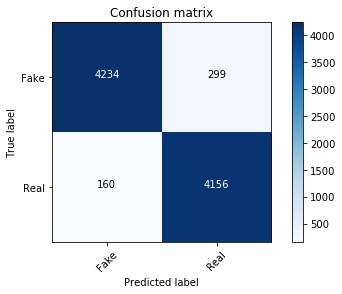

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic regression

In [26]:
# Vectorizing and applying TF-IDF
# Importing functions from SKLearn Library
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()

# Fitting the model
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Logistic Regression: {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
# Showing Test Accuracy by Trained Classifier
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Logistic Regression'] = round((stop - start),2)

Training time for Logistic Regression: 9.48s
accuracy: 98.8%


Confusion matrix, without normalization


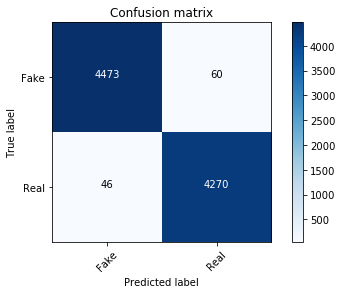

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [28]:
# Importing functions from SKLearn Library
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Fitting the model
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Decision Tree : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Decision Tree'] = round((stop - start),2)

Training time for Decision Tree : 17.74s
accuracy: 99.58%


Confusion matrix, without normalization


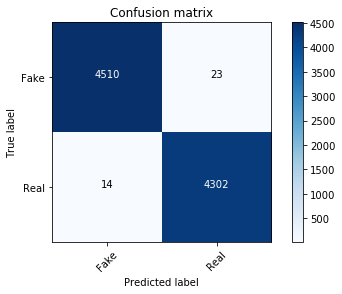

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [30]:
# Importing functions from SKLearn Library
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Random Forest : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Random Forest'] = round((stop - start),2)

Training time for Random Forest : 42.14s
accuracy: 99.01%


Confusion matrix, without normalization


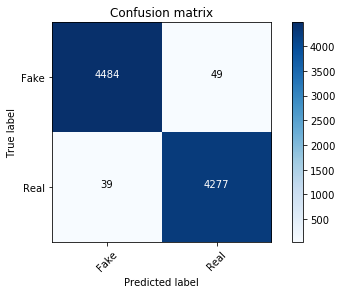

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [32]:
# Importing functions from SKLearn Library
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for SVM : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['SVM'] = round((stop - start),2)

Training time for SVM : 661.88s
accuracy: 99.47%


Confusion matrix, without normalization


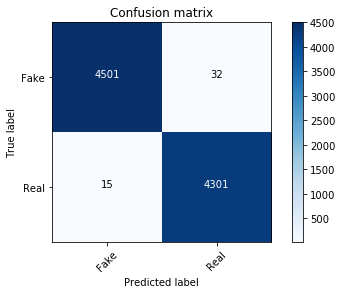

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# KNN

In [34]:
# Importing functions from SKLearn Library
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for KNN : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct['KNN'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['KNN'] = round((stop - start),2)

Training time for KNN : 6.6s
accuracy: 65.8%


Confusion matrix, without normalization


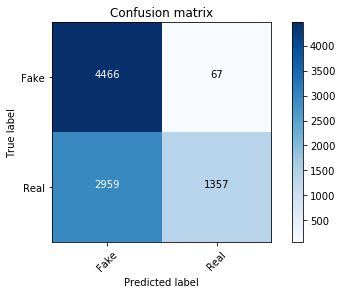

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Passive Aggressive Classifier

In [36]:
# Importing functions from SKLearn Library
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
model = pipe.fit(X_train, y_train)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Passive Aggresive : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct['Passive Aggresive'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Passive Aggresive'] = round((stop - start),2)

Training time for Passive Aggresive : 6.74s
accuracy: 99.56%


Confusion matrix, without normalization


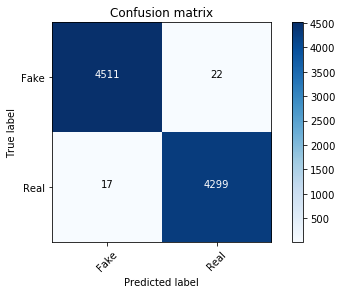

In [37]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

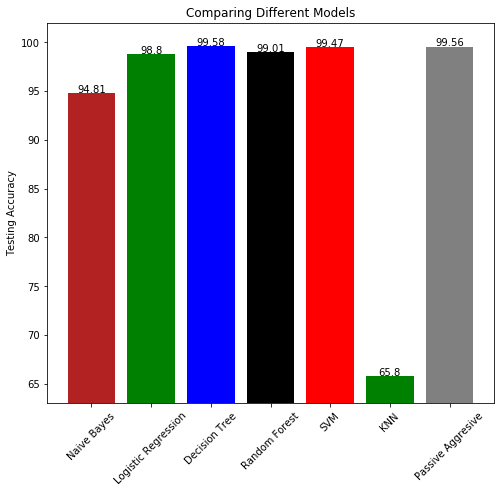

In [38]:
import matplotlib.pyplot as plt
import math
plt.figure(figsize=(8,7))
# Change color of each bar
plt.bar(list(dct.keys()),list(dct.values()), color=['firebrick', 'green', 'blue', 'black', 'red','green','gray'])

# Defining user defined function to show text on the top of each bar        
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0008*y[i],y[i],ha = 'center',rotation=0)
        
# Calling user defined function to show text on the top of each bar        
addtext(list(dct.keys()),list(dct.values()))
## Setting High and low limit of y labels 
max_value_dct = math.floor(max(dct.values()))
min_value_dct = math.floor(min(dct.values()))
plt.ylabel('Testing Accuracy')

plt.title('Comparing Different Models')
plt.ylim(min_value_dct-2,max_value_dct+3)

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

# Comparing Time Taken by Different Models

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

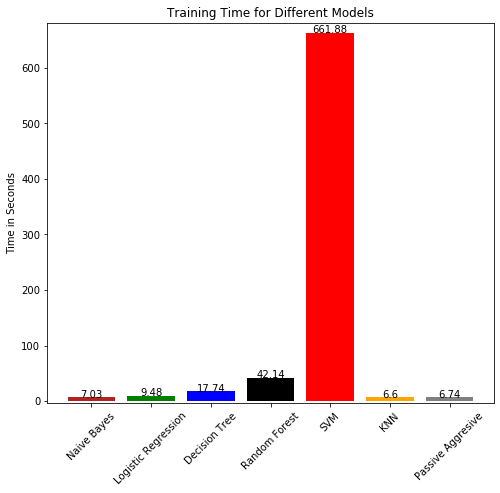

In [39]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(8,7))
# Change color of each bar
plt.bar(list(dct_time.keys()),list(dct_time.values()), color=['firebrick', 'green', 'blue', 'black', 'red','orange','gray'])
# Defining user defined function to show text on the top of each bar 
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0016*y[i],y[i],ha = 'center',rotation=0)
## Setting High and low limit of y labels     
max_value_dct_time = math.floor(max(dct_time.values()))
min_value_dct_time = math.floor(min(dct_time.values()))
 # Calling user defined function to show text on the top of each bar   
    
addtext(list(dct_time.keys()),list(dct_time.values()))

plt.title('Training Time for Different Models')
plt.ylim(min_value_dct_time-10,max_value_dct_time+20)
plt.ylabel('Time in Seconds')

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)
